# Сборный проект: Исследование и анализ рынка видеоигр

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Цель проекта

Исследовать предоставленные данные и сделать план рекламной кампании для магазина «Стримчик».

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Представленны данные до 2016 включительно.

# Содержание проекта

*  1. Открытие файла с данными и изучение общей информации
 * 1.1 Вывод
*  2. Подготовка данных
 * 2.1. Первичная обработка
 * 2.2. Обработка пропущенный значений и изменение типа данных
 * 2.3. Посчитаем суммарные продажи и запишим в отдельный столбец
 * 2.4. Вывод
*  3. Проведение исследовательского анализа данных
 * 3.1. Количество игр выпускаемых в разные года
 * 3.2. Продажи игр выпускаемых на разных платформах
 * 3.3. Продажи игр выпускаемых на разных платформах c 2013 года
 * 3.4. График «ящик с усами» по глобальным продажам игр в разбивке по платформам
 * 3.5. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
 * 3.6.Посмотрим, как влияют на продажи внутри остальных платформ отзывы пользователей и критиков и соотнесем с результатами прошлого пункта
 * 3.7. Посмотрите на общее распределение игр по жанрам
 * 3.8.Вывод

*  4. Составление портрета пользователя каждого региона (NA, EU, JP)
 * 4.1. Самые популярные платформы (топ-5)
 * 4.2. Самые популярные жанры (топ-5)
 * 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе
 * 4.4. Вывод
*  5. Проверка гипотез
 * 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 * 5.2. Cредние пользовательские рейтинги жанров Action и Sports разные
*  6. Общий вывод


## Открытие файла с данными и изучение общей информации

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings

warnings.filterwarnings(action='ignore')

Запишем данные в переменную, посмотрим на первые несколько строк и выведим info

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

**В ходе знакомства с данными данных:** Мы ознакомились с датафреймом, отметили его особенноси, например наименование столбцов с верхним регистром и неподходящим типом данных для user_score, определили какие шаги будут проведены в подготовке данных

## Подготовка данных

### Первичная обработка

Проверим данный на дубликаты

In [5]:
data.duplicated().sum()

0

Для удобства приведем значения в столбцах к нижнему регистру

In [6]:
data.columns = [column.lower() for column in data.columns]

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В инфо заметили, что User_Score имеет тип object хотя должен float64, проверим

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - с англ. "Подлежащий решению", в дальнейшем заменю их на NaN

Так же обратим внимание, что оценка критиков записана целым числом по 100 бальной шкале, в отличии от 10 бальной, но с десятичными долями, у пользователей. Можно будет поделить на 10 оценку критиков

### Обработка пропущенный значений и изменение типа данных

Посмотрим на общее количество пропущенных значений по столбцам

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Решаю удалить по 2 пропуска в name и genre тк в сумме не изменят общую картину

In [11]:
data = data.dropna(subset=['name','genre'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

С пропусками в year_of_release (год выхода игры) сделать на данном этапе ничего нельзя, нужно либо самим вручную вбиать, либо подключать парсер для автоматического поиска + добавления из интернета, но мы пока не проходили эту тему =)

Думаю удаление 269 из 16715 (1.6%) из датасета приемлемо

In [12]:
data = data.dropna(subset=['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Переведем значения "tbd" из user_score в значения "NaN", чтобы затем перевести весь столбец с object на float

In [13]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Переведем year_of_release с float на int

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')

Разделим значения critic_score на десять, чтобы совпадала разрядностью с user_score

In [17]:
data['critic_score'] = data['critic_score'] / 10

Обработка пропусков в столбцах critic_score и user_score проводить не стал, тк замена на медианные значения серьезно испортит статистику для дальнейшего подсчета корреляций, а удаление строк приведет к серьезному вмешательству в датафрейм, тк пропущенных значений в обоих столбцах примерно половина от всего датафрейма

### Посчитаем суммарные продажи и запишим в отдельный столбец

In [18]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

**В ходе подготовки данных:** Проверили датафрейм на дубликаты

Мы удалили в сумме 237 строки из 16715 (~1.6%) из столбцов "name", "year_of_release" и "genre".

Заменили в user_score значения c "tbd" на "NaN", а значения critic_score разделили на 10 для сходства с user_score.

Обработку пропусков в столбцах critic_score и user_score проводить не стал, тк замена на медианные значения серьезно испортит статистику для дальнейшего подсчета корреляций, а удаление строк приведет к серьезному вмешательству в датафрейм, тк пропущенных значений в обоих столбцах примерно половина от всего датафрейма

Заменили типы данных в year_of_release и user_score на более подходящий.

Добавили в таблицу столбец world_sales с суммарными продажами из "na_sales", "eu_sales", "jp_sales" и "other_sales".


## Проведение исследовательского анализа данных

### Количество игр выпускаемых в разные года

Создадим сводную таблицу по годам по сумме выходивших игр и визуализируев в графике

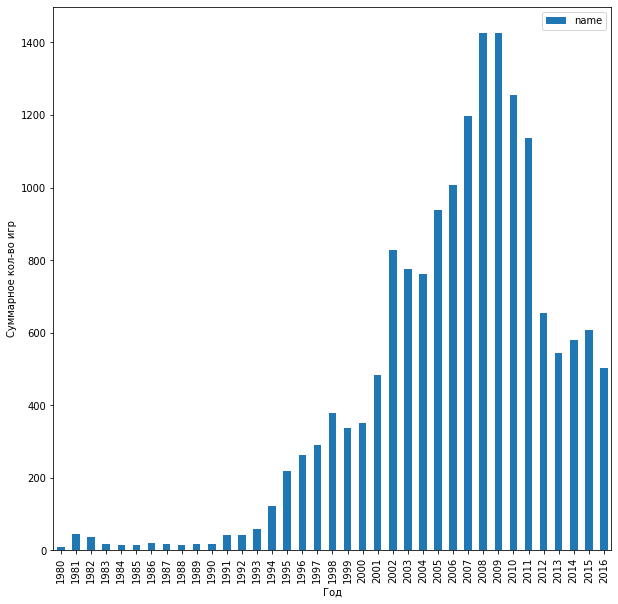

In [19]:
year_of_release_pivot = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Год');
plt.ylabel('Суммарное кол-во игр');

На графике виден рост игровой индустрии до 2008 и 2009 годов и резкий спад, связать это можно с мировым кризисом 2008 года который затронул все сферы бизнеса экономики, включая игровую.

Думаю актуальными можно назвать данные начиная с 2012 года, когда резкий спад остановился.

### Продажи игр выпускаемых на разных платформах

Создадим сводную таблицу по платформам по суммарным продажам игр и визуализируев в графике

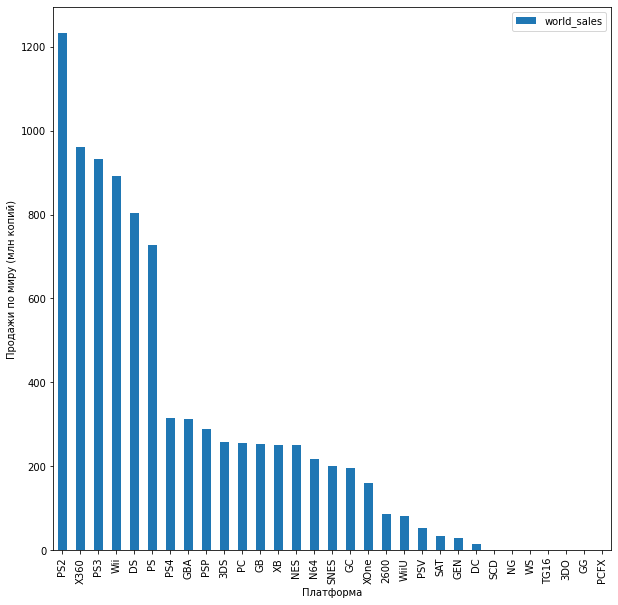

In [20]:
platform_pivot = (data
    .pivot_table(index='platform', values='world_sales', aggfunc='sum')
    .sort_values(by='world_sales', ascending=False)
)
platform_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Платформа');
plt.ylabel('Продажи по миру (млн копий)');

Рассмотрим 4 платформы с наибольшими суммарными продажами и построем их распределение по годам.

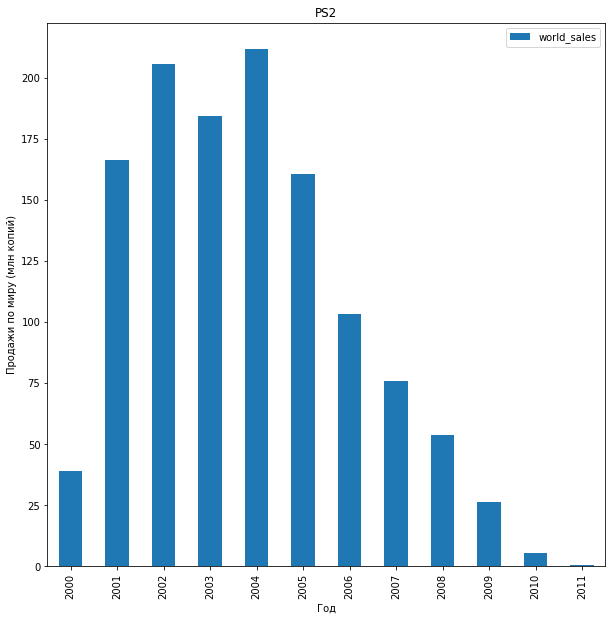

In [21]:
ps2_pivot = data[data['platform']=='PS2'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
ps2_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Год');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('PS2');

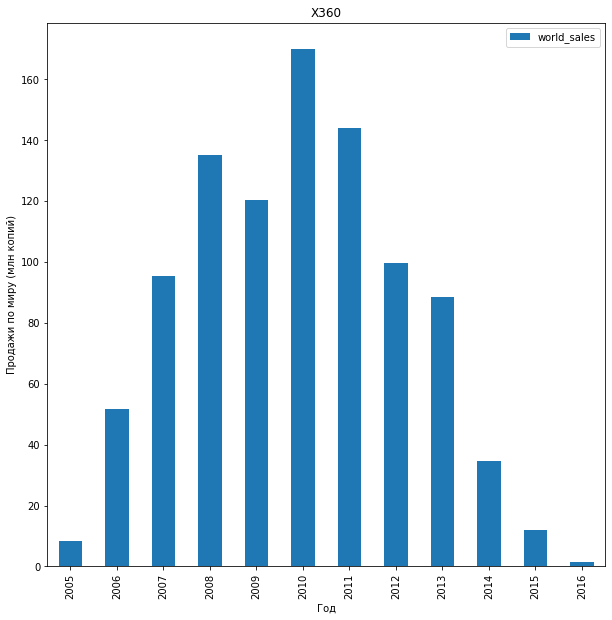

In [22]:
x360_pivot = data[data['platform']=='X360'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
x360_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Год');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('X360');

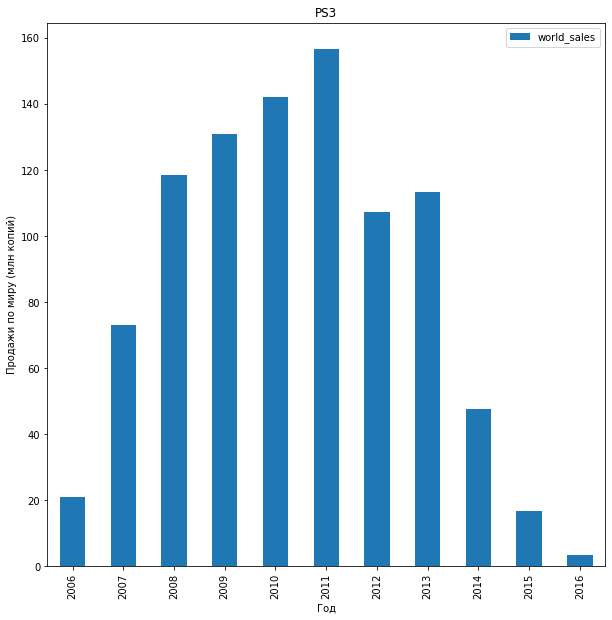

In [23]:
ps3_pivot = data[data['platform']=='PS3'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
ps3_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Год');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('PS3');

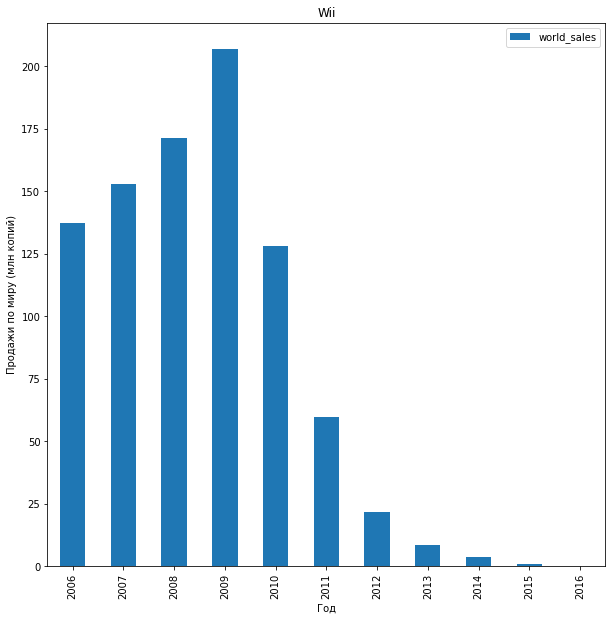

In [24]:
wii_pivot = data[data['platform']=='Wii'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum')
wii_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Год');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('Wii');

По графикам видно, что срок "службы" платформ составляет примерно 9-10 лет, пик продаж приходится на 4-5 год платформы. На графиках присутствуют сменяющие друг друга поколения платформы PS2 и PS3. В 2006 году идет спад продаж PS2, в этот же момент появляется PS3, которая достигает пика продаж в 2010-2011 годах, когда продажи PS2 прекращаются

Думаю изходя из всех данных самым актуальными для прогноза на 2017 год можно считать 2013 год и так каждые 4 года

### Продажи игр выпускаемых на разных платформах c 2013 года

Создадим новый датафрейм со срезом с 2013 году в year_of_release

In [25]:
data_actual = data.query('year_of_release >= 2013')
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62


Создадим сводные таблицы по платформам от суммы мировых продаж по актуальным годам и построим графики 

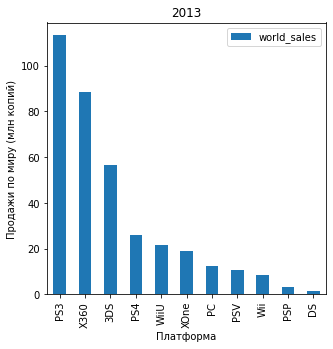

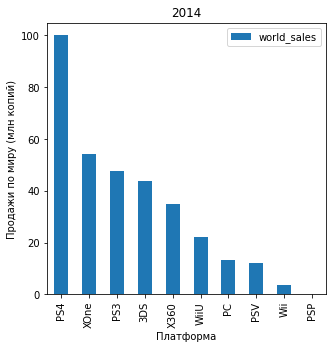

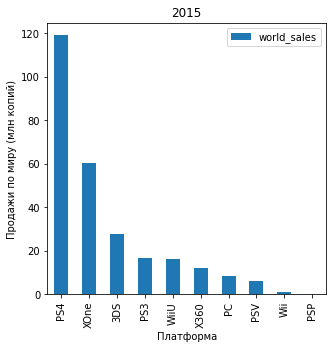

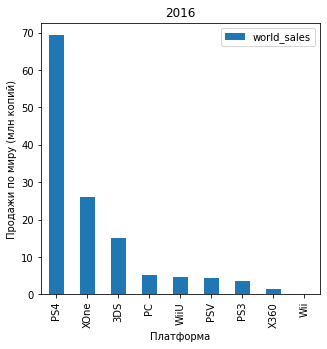

In [26]:
platform_2013_pivot = (data_actual[data_actual['year_of_release']==2013]
    .pivot_table(index='platform', values='world_sales', aggfunc='sum')
    .sort_values(by='world_sales', ascending=False)
)
platform_2013_pivot.plot(kind='bar', figsize=(5, 5));
plt.xlabel('Платформа');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('2013');

platform_2014_pivot = (data_actual[data_actual['year_of_release']==2014]
    .pivot_table(index='platform', values='world_sales', aggfunc='sum')
    .sort_values(by='world_sales', ascending=False)
)
platform_2014_pivot.plot(kind='bar', figsize=(5, 5));
plt.xlabel('Платформа');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('2014');

platform_2015_pivot = (data_actual[data_actual['year_of_release']==2015]
    .pivot_table(index='platform', values='world_sales', aggfunc='sum')
    .sort_values(by='world_sales', ascending=False)
)
platform_2015_pivot.plot(kind='bar', figsize=(5, 5));
plt.xlabel('Платформа');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('2015');

platform_2016_pivot = (data_actual[data_actual['year_of_release']==2016]
    .pivot_table(index='platform', values='world_sales', aggfunc='sum')
    .sort_values(by='world_sales', ascending=False)
)
platform_2016_pivot.plot(kind='bar', figsize=(5, 5));
plt.xlabel('Платформа');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('2016');

Потенциально прибыльными платформами можно назвать платформы PS4 и XOne. Хорошо видно, как эти плотформы на графиках 2013-2014 годов обгоняют своих же предшественников PS3 и X360. В последующее годы 2015-2016 они тоже не смещаются со своих позиций

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Построим график по актульным данным из data_actual по platform и world_sales

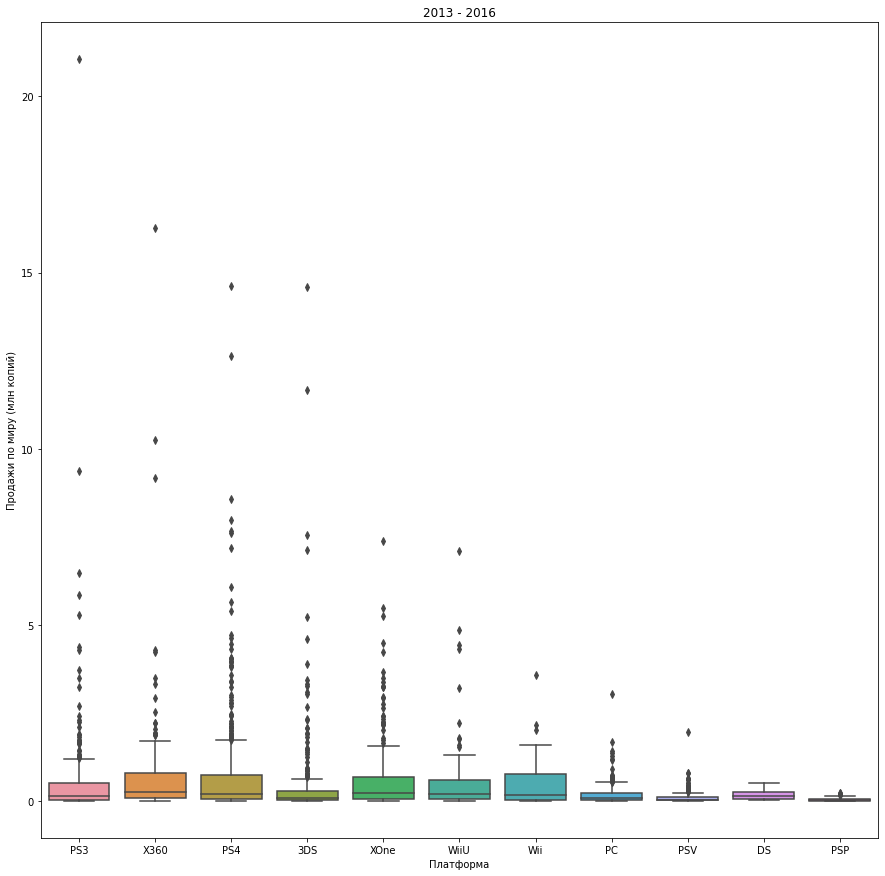

In [27]:
plt.figure(figsize=(15,15))
sns.boxplot(x='platform', y='world_sales', data=data_actual)
plt.xlabel('Платформа');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('2013 - 2016');

Ограничим график по оси y чтобы лучше рассмотреть

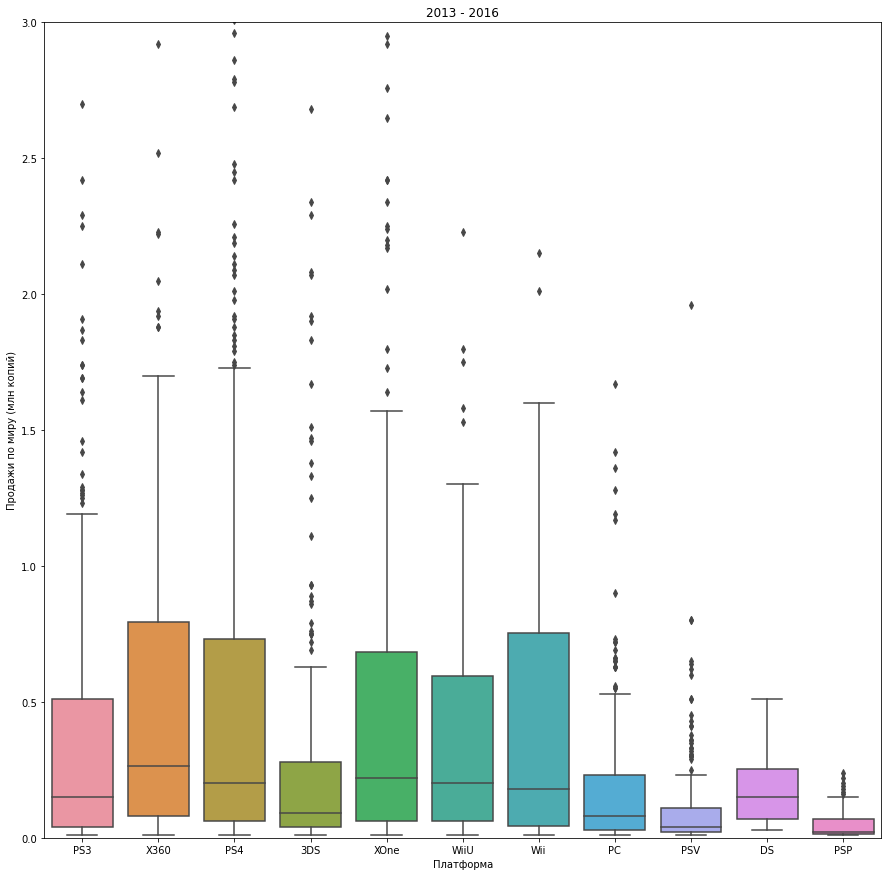

In [28]:
plt.figure(figsize=(15,15))
sns.boxplot(x='platform', y='world_sales', data=data_actual)
plt.xlabel('Платформа');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('2013 - 2016');
plt.ylim([0, 3]);

Диаграмма размаха сильно скошенна вправо, большое количество вбросов, что вполне объяснимо, некоторые игры в несколько раз более продоваемы, чем остальные. Медианные значения мировых продаж у "фаворитов" не достигают и полумиллиона.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Создадим новый датафрейм по срезом по platform == PS4 оставив в ней только столбцы с critic_score, user_score и world_sales

In [29]:
data_actual_ps4 = data_actual[data_actual['platform']=='PS4']
data_actual_ps4 = data_actual_ps4[['world_sales', 'critic_score', 'user_score']]
data_actual_ps4.head()

,world_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,9.7,8.3
77,8.58,8.2,4.3
87,7.98,NaN,NaN
92,7.66,8.3,5.7


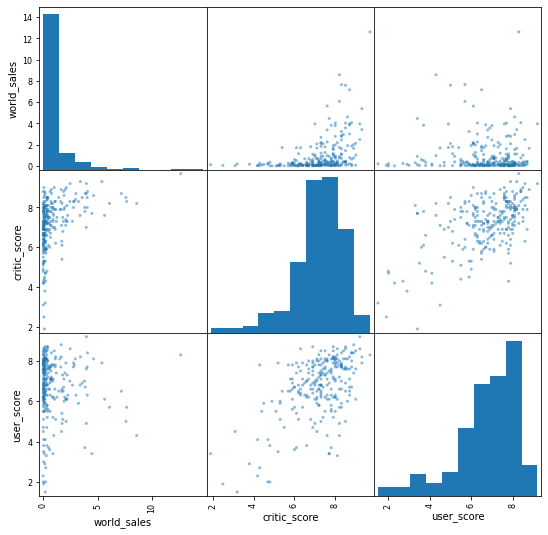

In [30]:
pd.plotting.scatter_matrix(data_actual_ps4, figsize=(9, 9));

In [31]:
data_actual_ps4.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Есть некоторая корреляция между оценками критиков и мировыми продажами и совсем нет корреляции от оценки пользователей.

### Посмотрим, как влияют на продажи внутри остальных платформ отзывы пользователей и критиков и соотнесем с результатами прошлого пункта

Создадим новую таблицу по срезом по platform != PS4 оставив в ней только столбцы с critic_score, user_score и world_sales

In [32]:
data_actual_other = data_actual[data_actual['platform']!='PS4']
data_actual_other = data_actual_other[['world_sales', 'critic_score', 'user_score']]
data_actual_other.head()

,world_sales,critic_score,user_score
16,21.05,9.7,8.2
23,16.27,9.7,8.1
33,14.60,NaN,NaN
47,11.68,NaN,NaN
60,10.24,7.3,2.6


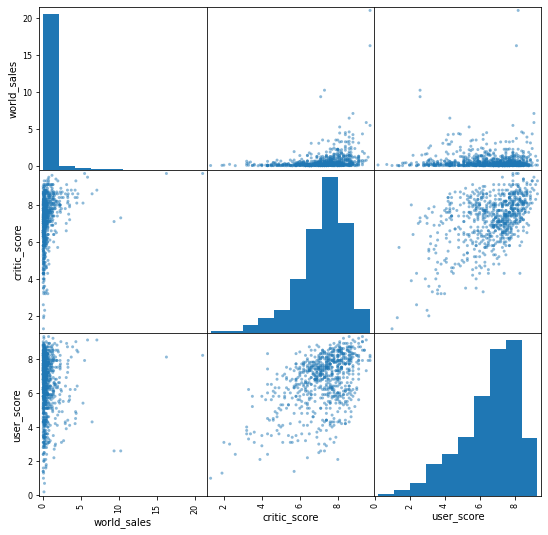

In [33]:
pd.plotting.scatter_matrix(data_actual_other, figsize=(9, 9));

Для наглядности также выведем еще раз график для PS4 и численные значения корреляции и визуально сравним их

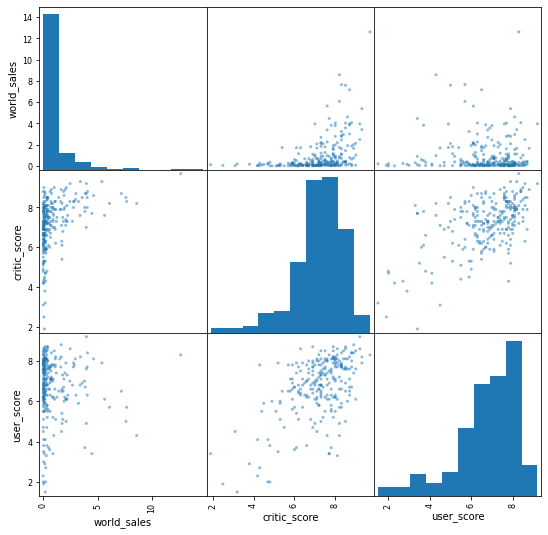

In [34]:
pd.plotting.scatter_matrix(data_actual_ps4, figsize=(9, 9));

In [35]:
data_actual_ps4.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Граффики визуально схожи, данные корреляции такие же небольшие, но чуть-чуть отличаются, у critic_score на PS4 0.40, на остальных платформах 0.28, user_score в обоих случаях околонулевой

In [36]:
data_actual_other.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.281251,-0.001122
critic_score,0.281251,1.000000,0.484554
user_score,-0.001122,0.484554,1.000000


Практически идентичный результат, корреляция у критиков упала с 0.40 до 0.28, у пользователей все такая же околонулевая.

### Посмотрите на общее распределение игр по жанрам

Создадим сводную таблицу по жанрам от суммы мировых продаж и построим график

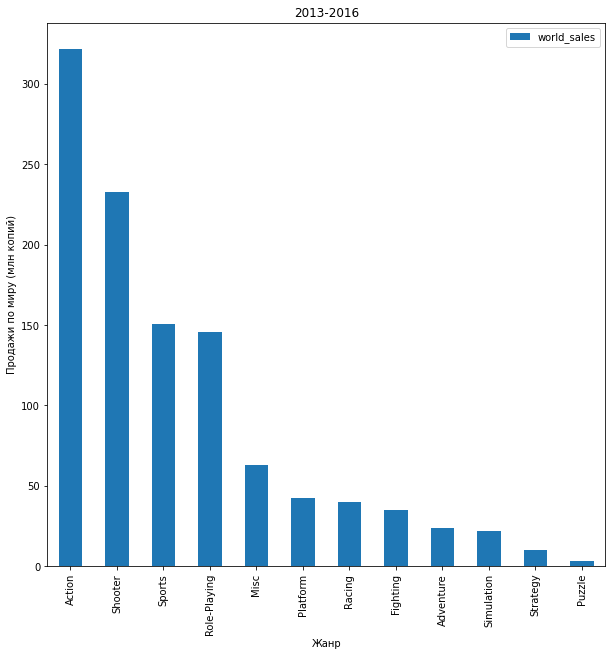

In [37]:
genre_pivot_world_sales = (data_actual
    .pivot_table(index='genre', values='world_sales', aggfunc='sum')
    .sort_values(by='world_sales', ascending=False)
)
genre_pivot_world_sales.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Жанр');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('2013-2016');

Построим график размаха по жанрам от суммы мировых продаж

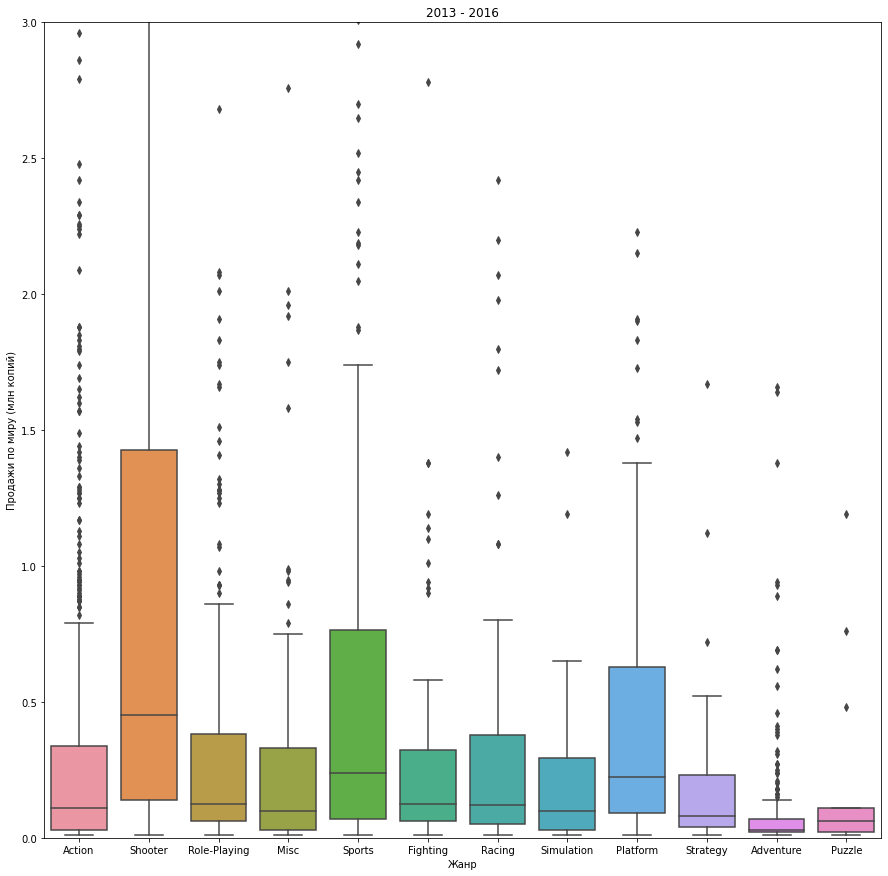

In [38]:
plt.figure(figsize=(15,15))
sns.boxplot(x='genre', y='world_sales', data=data_actual)
plt.xlabel('Жанр');
plt.ylabel('Продажи по миру (млн копий)');
plt.title('2013 - 2016');
plt.ylim([0, 3]);

Создадим сводную таблицу по жанрам от общей суммы выходивших игр и построим график

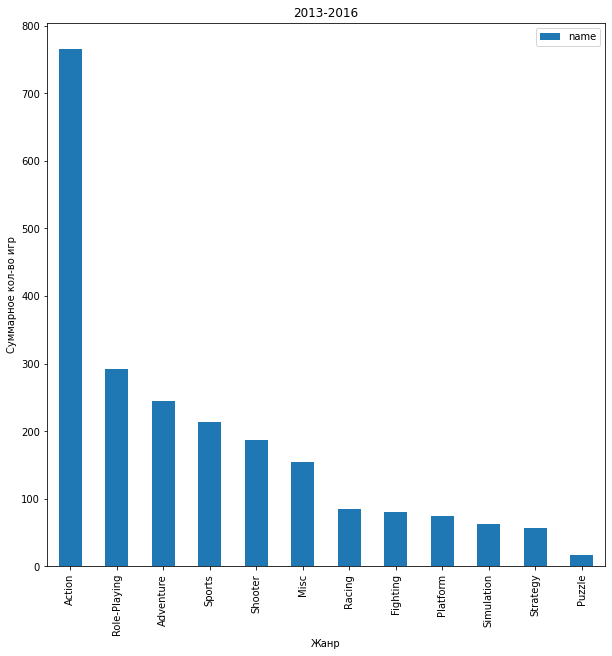

In [39]:
genre_pivot_name = (data_actual
    .pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(by='name', ascending=False)
)
genre_pivot_name.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Жанр');
plt.ylabel('Суммарное кол-во игр');
plt.title('2013-2016');

Видно по графикам, что и по количеству проданных копий, и по количеству вышедших игр лидирует жанр "Action", но что интересно, вторым местом по продажам идёт "Shooter", а вот по количеству игр аж на пятом

Посчитаем соотношение "ценности" одной игры по жанрам

In [40]:
fun_stat = genre_pivot_world_sales['world_sales'] / genre_pivot_name['name']
fun_stat

genre
Action          0.420196
Adventure       0.096490
Fighting        0.441375
Misc            0.405290
Platform        0.576081
Puzzle          0.186471
Racing          0.469294
Role-Playing    0.499623
Shooter         1.245882
Simulation      0.350968
Sports          0.703972
Strategy        0.180000
dtype: float64

Построим график соотношений по жанрам

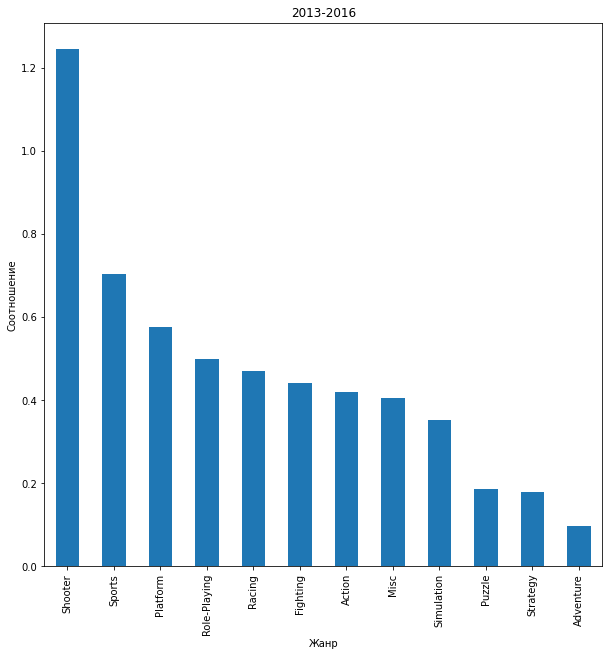

In [41]:
(fun_stat
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(10, 10))
);
plt.xlabel('Жанр');
plt.ylabel('Соотношение');
plt.title('2013-2016');

В итоге в соотношении продажи копий по миру к общей сумме игр по жанрам выгоднее "Shooter", а "Action" не входит даже в пятерку лучших

### Вывод

**В ходе проведения исследовательского анализа данных:** Были выявленны некоторые закономерности. По общей сумме игр и мировых продаж лидирует две платформы, PS и XBOX в каждом поклении. Поколения консолей сменяют друг друга в среднем каждые 9 лет, пик продаж приходится на 3-5 год "жизни" платформы. Менее успешными можно назвать портативные платформы, платформы предыдущих покалений и персноальный компьютер

Оценик критиков в целом не сильно влияют на продажи игр, что на лучшей платформе, что на остальных, от 0.28 до 0.40 коэффициент корреляции. Оценки же пользователей вообще не влияют на продажи, коэффициент близок к нулю

Общее распределение игр по жанрам выявило некоторую интересность, самый продаваемый и самый многочисленный по играм жанр "Action" в соотношении продаж к количеству игр находится на 7 месте с 0.42 миллионами копий на игру, а его предшественник по продажам жанр "Shooter" имеет соотношение 1.24 миллионами копий на игру тк общее количество игр этого жанра мало, на пятом месте. Самым убыточным жанром по графикам является "Adventure"



## Составление портрета пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5)

Создадим сводные таблици по платформам по продажам игр в Северной Америке, Европе и Японии и визуализируев в графиках

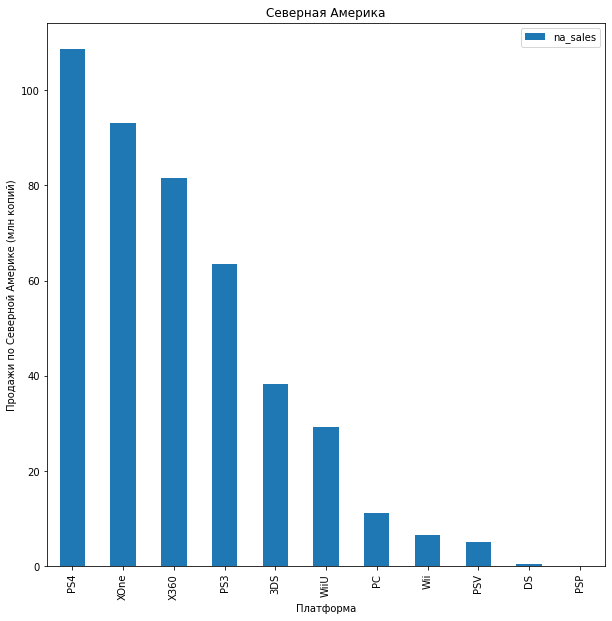

In [42]:
na_platform_pivot = (data_actual
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
na_platform_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Платформа');
plt.ylabel('Продажи по Северной Америке (млн копий)');
plt.title('Северная Америка');

В Северной Америке преобладает PS4 и чуть отстает XOne



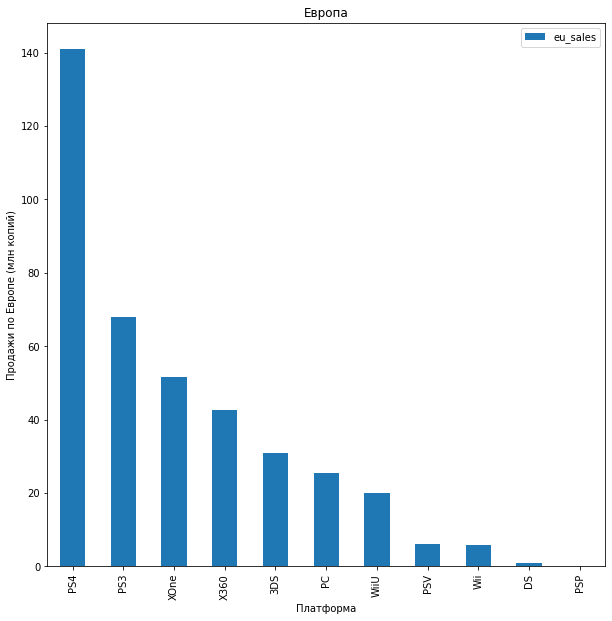

In [43]:
eu_platform_pivot = (data_actual
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
eu_platform_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Платформа');
plt.ylabel('Продажи по Европе (млн копий)');
plt.title('Европа');

В Европе также преобладает PS4, за ней её предшественница PS3, XOne за ними

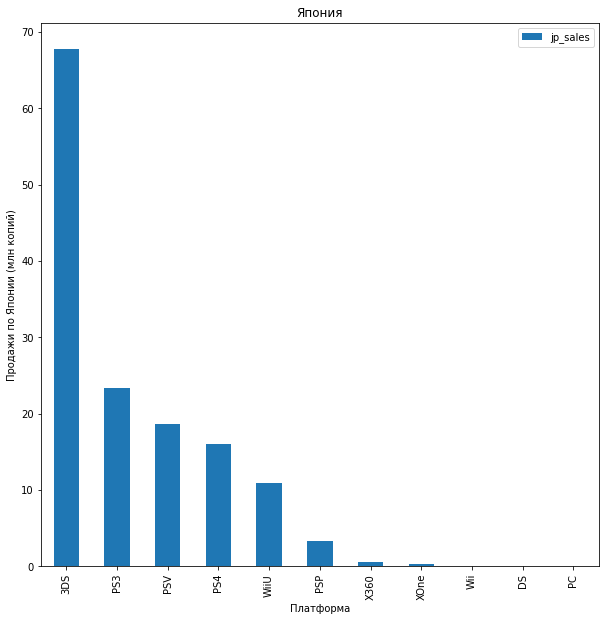

In [44]:
jp_platform_pivot = (data_actual
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
jp_platform_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Платформа');
plt.ylabel('Продажи по Японии (млн копий)');
plt.title('Япония');

Интересно, что народине PS в Японии она не на первом месте, на первом 3DS. Видимо японцы препочитают портативные платформы

### Самые популярные жанры (топ-5)

Создадим сводные таблици по жанрам по продажам игр в Северной Америке, Европе и Японии и визуализируев в графиках

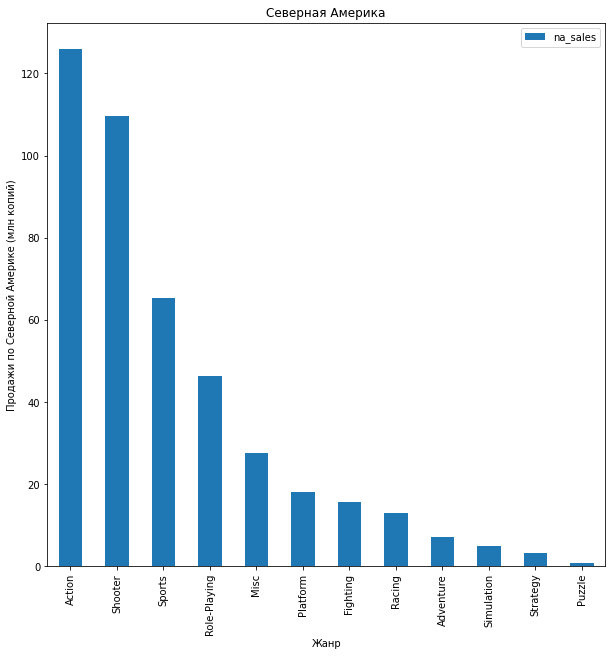

In [45]:
na_genre_pivot = (data_actual
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
na_genre_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Жанр');
plt.ylabel('Продажи по Северной Америке (млн копий)');
plt.title('Северная Америка');

Жанровые предпочтения американцев очень сходи с тем, что мы видели в пункту 3.7

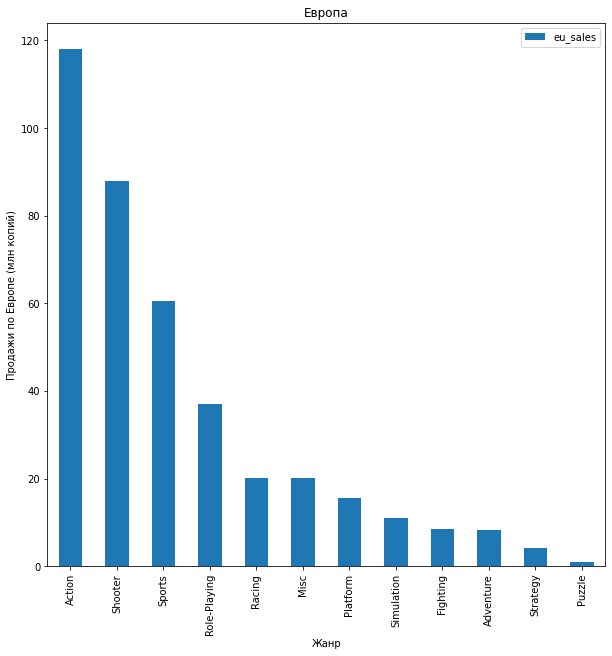

In [51]:
eu_genre_pivot = (data_actual
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
eu_genre_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Жанр');
plt.ylabel('Продажи по Европе (млн копий)');
plt.title('Европа');

Как и прошлом пункте европейцы мало чем отличаются от амриканцев, меньше жанра "Shooter" и "Racing" в топ 5 попал

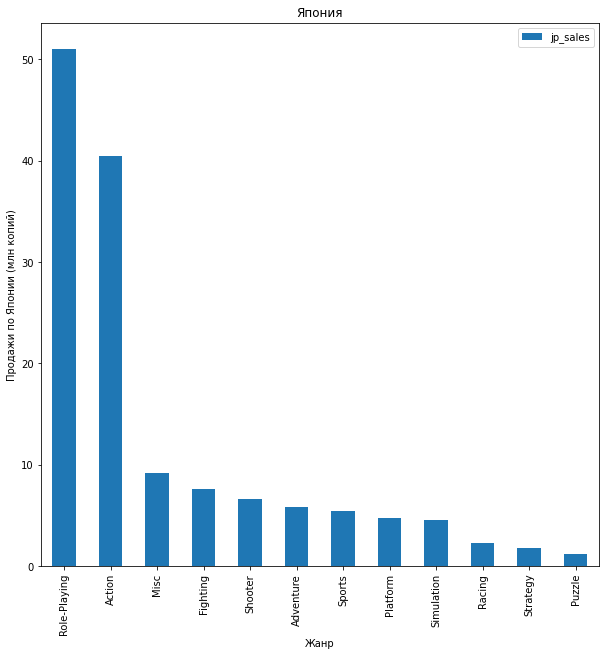

In [47]:
jp_genre_pivot = (data_actual
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
jp_genre_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Жанр');
plt.ylabel('Продажи по Японии (млн копий)');
plt.title('Япония');

Японцы снова удивили, у них на перовом месте жанр занимающий 4 место у соседей - "Role-Playing"

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Создадим сводные таблици по рейтингу по продажам игр в Северной Америке, Европе и Японии и визуализируев в графиках

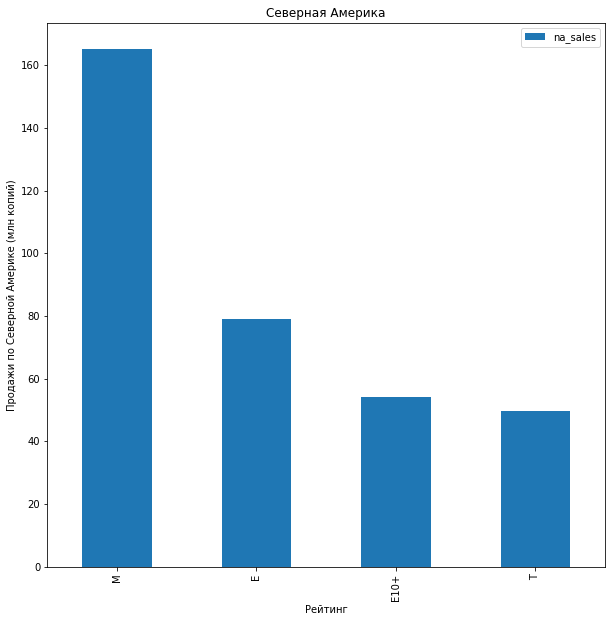

In [48]:
na_rating_pivot = (data_actual
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
na_rating_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Рейтинг');
plt.ylabel('Продажи по Северной Америке (млн копий)');
plt.title('Северная Америка');

В Северной Америке превалирует рейтинг "M" - от 17 лет и старше (старший подросток)

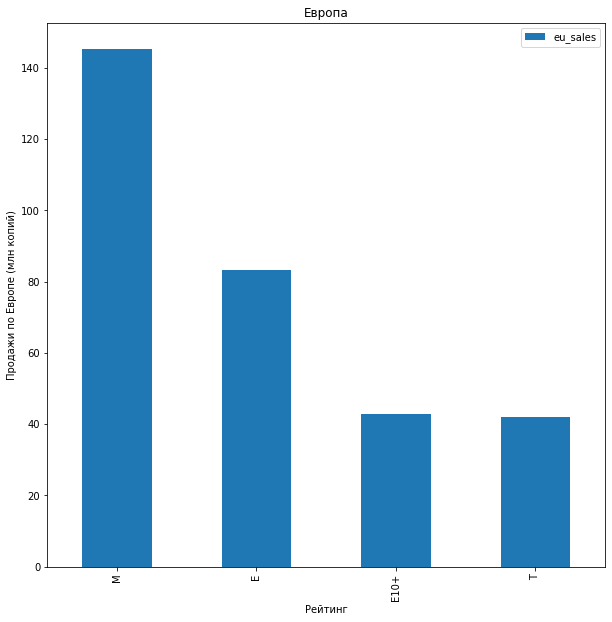

In [49]:
eu_rating_pivot = (data_actual
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
eu_rating_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Рейтинг');
plt.ylabel('Продажи по Европе (млн копий)');
plt.title('Европа');

В Европе тоже превалирует рейтинг "M" - от 17 лет и старше (старший подросток)

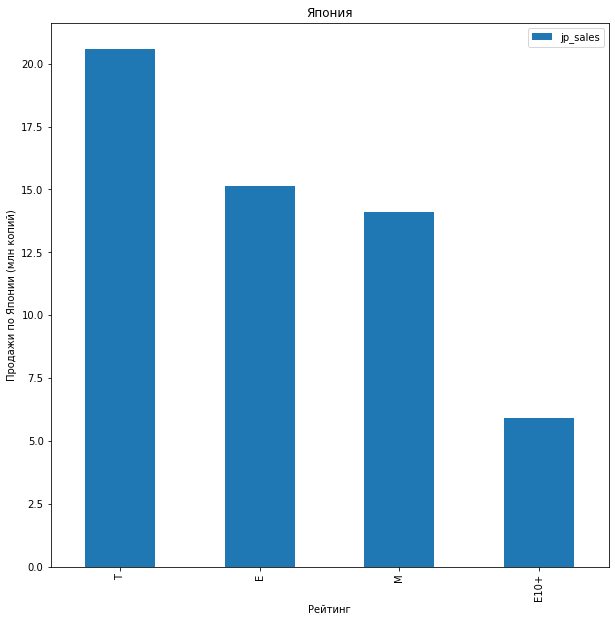

In [50]:
jp_rating_pivot = (data_actual
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
jp_rating_pivot.plot(kind='bar', figsize=(10, 10));
plt.xlabel('Рейтинг');
plt.ylabel('Продажи по Японии (млн копий)');
plt.title('Япония');

И здесь Япония отличилась, превалирует рейтинг "T" - для лиц от 13 лет и старше (младший подросток)

### Вывод

**Результат работы по составлению портрета пользователя по регионом:** Отмечу, что картина для Европы и Северной Америки очень схожа, буквально одно лицо, средний пользователь играет на платформе PS4, американец еще чуть реже в XOne, в игры жанра "Shooter" или "Action" с рейтингом "M" - от 17 лет и старше (старший подросток)

Япония держится особняком вокруг своей культуры, поэтому их средней пользователь играет на платформе в игры жанра "Role-Playing" с рейтингом "T" - для лиц от 13 лет и старше (младший подросток)

Реже всего во всех категориях можно встретить пользователя с платформы ПК играющего в игры жанра "Puzzle" с рейтингом "E10+" - от 10 лет и старше (ребёнок)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для начала сформулируев гипотезы

H_0: Средний пользовательский рейтинг на платформе XOne = Средний пользовательский рейтинг на платформе PC

H_1: Средний пользовательский рейтинг на платформе XOne != Средний пользовательский рейтинг на платформе PC

alpha = 0.05

Создаем отдельные таблицы с пользовательским рейтингом на платформах

In [51]:
pc_user_score = data_actual[data_actual['platform']=='PC']
pc_user_score = pc_user_score[pc_user_score['user_score'].isnull() == False]

In [52]:
xone_user_score = data_actual[data_actual['platform']=='XOne']
xone_user_score = xone_user_score[xone_user_score['user_score'].isnull() == False]

Вызываю метод для проверки двусторонней гипотезы

In [53]:
alpha = 0.05

In [54]:
results = st.ttest_ind(pc_user_score['user_score'], xone_user_score['user_score'], equal_var = False)

In [55]:
results.pvalue

0.14759594013430463

In [56]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Метод t-тест показал, что мы не можем отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги обоих плотформ равны

### Cредние пользовательские рейтинги жанров Action и Sports разные

Для начала сформулируев гипотезы

H_0: Средний пользовательский рейтинг Action = Средний пользовательский рейтинг Sports

H_1: Средний пользовательский рейтинг Action != Средний пользовательский рейтинг Sports

alpha = 0.05

Создаем отдельные таблицы с пользовательским рейтингом жанров

In [57]:
аction_user_score = data_actual[data_actual['genre']=='Action']
аction_user_score = аction_user_score[аction_user_score['user_score'].isnull() == False]

In [58]:
sports_user_score = data_actual[data_actual['genre']=='Sports']
sports_user_score = sports_user_score[sports_user_score['user_score'].isnull() == False]

Вызываю метод для проверки двусторонней гипотезы

In [59]:
alpha = 0.05

In [60]:
results = st.ttest_ind(аction_user_score['user_score'], sports_user_score['user_score'], equal_var = False)

In [61]:
results.pvalue

1.4460039700704315e-20

In [62]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Метод t-тест показал, что мы можем отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги обоих жанров не равны

### Вывод

**В ходе проведения проверки гипотез:** Можно заключить, что метод t-теста показал, что средние пользовательские рейтинги платформ Xbox one и PC одинаковые и что средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

В ходе работы мы обработали датафрейм, удалины ненужные строки, изменен тип данных. От изначального количества строк в датафрейме(16715) было в общей сумме удалено 237 строк, что составляет примерно1.6%.  Был добавлен в таблицу столбец world_sales с суммарными продажами из "na_sales", "eu_sales", "jp_sales" и "other_sales".

Был проведен исследовательский анализ данных в ходе которых были обнаруженны некоторые закономерности. По общей сумме игр и мировых продаж лидирует две платформы, PS и XBOX в каждом поклении. Поколения консолей сменяют друг друга в среднем каждые 9 лет, пик продаж приходится на 3-5 год "жизни" платформы. Менее успешными можно назвать портативные платформы, платформы предыдущих покалений и персональный компьютер.

Оценик критиков в целом не сильно влияют на продажи игр, что на лучшей платформе, что на остальных, от 0.28 до 0.40 коэффициент корреляции. Оценки же пользователей вообще не влияют на продажи, коэффициент близок к нулю

Общее распределение игр по жанрам выявило некоторую интересность, самый продаваемый и самый многочисленный по играм жанр "Action" в соотношении продаж к количеству игр находится на 7 месте с 0.42 миллионами копий на игру, а его предшественник по продажам жанр "Shooter" имеет соотношение 1.24 миллионами копий на игру тк общее количество игр этого жанра мало, на пятом месте. Самым убыточным жанром по графикам является "Adventure"

Были определенны целевые пользователи по разным регионам мира. Американский и европейский пользователи похож, играют в основном с платформы PS4 в "Shooter" и "Action" игры, рейтинг предпочитают "M". Японский пользователь сдержаннее, играет с платформы 3DS в "Role-Playing" игры, рейтинг предпочитают "Т". Все пользователи мало обращают внимания на игры жанра "Puzzle" и платформу ПК

Метод t-теста показал, что средние пользовательские рейтинги платформ Xbox one и PC одинаковые и что средние пользовательские рейтинги жанров Action и Sports разные

Отвечая на запрос бизнеса по плану на рекламную компанию 2017 года хочу посоветовать:
* Обратить внимание в первую очередь на рынок платформы PS4, а в дальнейшем и её приемника, тк этот рынок самый большой в Европе и Северной америке
* Опираться на 3 популярных жанрах "Action", "Shooter" и "Role-Playing", на "Shooter" в первую очередь тк соотношение проданные к количеству игр жанра больше, чем у кого-либо
* Не сильно доверять оценке критиков и не доверять оценке пользователей вовсе =)